<font size="6"><b><ul><ul>Yulu Case Study
    
<br>
    <hr><br>

<font size="4"><div align="justify">
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.<br>
<font size="4">
The company wants to know:<br><br>
•	Which variables are significant in predicting the demand for shared electric cycles in the Indian market?<br><br>
•	How well those variables describe the electric cycle demands
    
    


<br>
<font size="4">
1. Importing the data and usual analysis.<br><br>

<ul>a. Data types present in the dataset.
 <br><br>


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

yl=pd.read_csv(r"C:\Users\devip\OneDrive\Desktop\Scaler\Hypothesis testing\bike_sharing.csv")
yl.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [42]:
yl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [43]:
yl['season'] = yl['season'].apply(lambda x: 'spring' if x == 1 else 'summer' if x == 2 else 'fall' if x == 3 else 'winter' if x == 4 else 'unknown')
yl['holiday']=yl['holiday'].apply(lambda x: 'holiday' if x==1 else 'non holiday' if x==0 else x)
yl['workingday']=yl['workingday'].apply(lambda x: 'workingday' if x==1 else 'non workingday' if x==0 else x)
yl['weather']=yl['weather'].astype('str')
yl['datetime'] = pd.to_datetime(yl['datetime'])
yl.rename({'count':'totalcount'},inplace=True,axis=1)

<br>
<font size="4"><ul>
Converting the columns season, holiday, workingday and weather to string as they are categorical columns and datetime for type datetime.
<br>


<hr>
<br>
<font size="4">
b. What is the shape of the dataset.
<br><br>

In [44]:
yl.shape

(10886, 12)

<br>
<font size="4"><ul>
The dataset has 10886 rows and 12 columns
<br>
<hr>
    

  


<br>
<font size="4">
c. Check for duplicate rows.
<br><br>

In [45]:
yl[yl.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,totalcount


<br>
<font size="4"><ul>
The dataset do not have any duplicate rows
<br>
<hr>
    

<br>
<font size="4">
d. Checking for null values.
<br><br>

In [46]:
yl[yl.isna().sum(axis=1)>0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,totalcount


<br>
<font size="4"><ul>
There is no missing data or null value in the dataset
<br>
<hr>

<br>
<font size="4">
e. Describing the dataset
<br><br>

In [47]:
yl.describe()

,temp,atemp,humidity,windspeed,casual,registered,totalcount
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [48]:
yl.describe(include=['object', 'bool'])

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,winter,non holiday,workingday,1
freq,2734,10575,7412,7192


<br>
<hr>


<br>
<font size="4">
2. Detecting outliers and count of each column.
<br><br>
<ul>
a. Outliers and count in datetime column
<br><br>

([<matplotlib.axis.XTick at 0x17c02c0afd0>,
 [Text(1290000000.0, 0, '2010-11-17'),
  Text(1300000000.0, 0, '2011-03-13'),
  Text(1310000000.0, 0, '2011-07-07'),
  Text(1320000000.0, 0, '2011-10-30'),
  Text(1330000000.0, 0, '2012-02-23'),
  Text(1340000000.0, 0, '2012-06-18'),
  Text(1350000000.0, 0, '2012-10-12'),
  Text(1360000000.0, 0, '2013-02-04')])

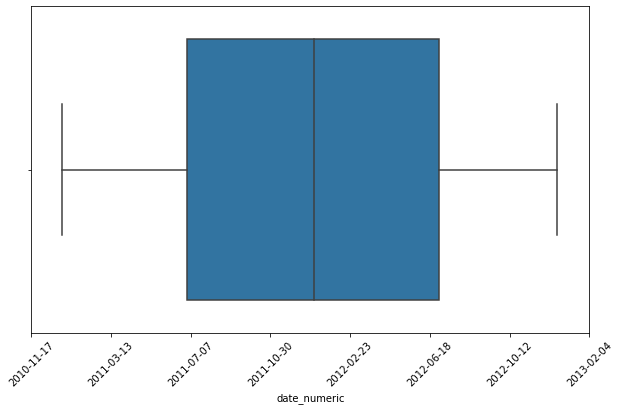

In [49]:
yl['date_numeric'] = yl['datetime'].view('int64')/ 10**9  

plt.figure(figsize=(10, 6))
sns.boxplot(x=yl['date_numeric'])
tick_labels = pd.to_datetime(plt.xticks()[0] * 10**9, unit='ns')
plt.xticks(ticks=plt.xticks()[0], labels=tick_labels.strftime('%Y-%m-%d'), rotation=45)

<br>
<font size="4"><ul>
There are no outliers in the column datetime
<br><br>    

In [50]:
yl.datetime.describe(datetime_is_numeric=True)

count                            10886
mean     2011-12-26 19:39:09.292669440
min                2011-01-01 00:00:00
25%                2011-07-01 19:15:00
50%                2012-01-01 20:30:00
75%                2012-07-01 09:45:00
max                2012-12-19 23:00:00
Name: datetime, dtype: object

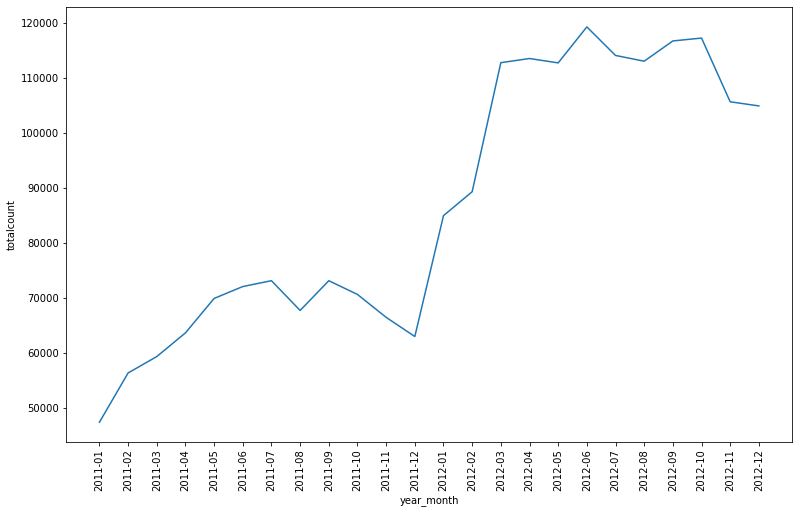

In [51]:
plt.figure(figsize=(13,8))
yl['year_month'] = yl['datetime'].dt.strftime('%Y-%m')
countym = yl.groupby('year_month').totalcount.sum()


countym = countym.reset_index(name='totalcount')


sns.lineplot(data=countym, x='year_month', y='totalcount')
plt.xticks(rotation=90)
plt.show()

In [52]:
countym.describe()

,totalcount
count,24.000000
mean,86894.833333
std,24064.281157
min,47327.000000
25%,67342.750000
50%,78982.000000
75%,112777.500000
max,119214.000000


<br>
<font size="4">
The above graph shows the count of total rental bikes including both casual and registered in each month of the year.<br><br>

<li>The first date in the dataset is 2011-01-01 00:00:00 and last datetime is 2012-12-19 23:00:00<br><br>
<li>We can see that the lowest total count of rental bikes was the initial month 2011 January ( 47327 ). <br><br>
<li>The grapgh shows an increasing pattern in the initial months of the year. A drastic increase in the month of January of 2012.<br><br>
<li>The highest number can be seen for June 2012 ( 119214 ).<br><br>
<li>We can see a large dip in the months of November and December of 2011 and 2012.<br><br>


<AxesSubplot:xlabel='hour', ylabel='totalcount'>

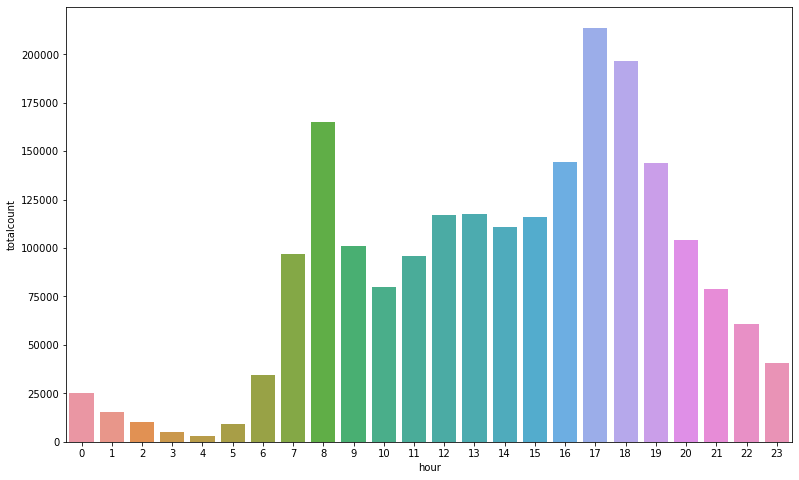

In [53]:
plt.figure(figsize=(13,8))
yl['hour']=yl['datetime'].dt.hour
counth=yl.groupby('hour').totalcount.sum()

counth=counth.reset_index()
sns.barplot(data=counth,x='hour',y='totalcount')


<br>
<font size="4">
The above graph shows the count of total rental bikes including both casual and registered for each hour of the day.<br><br>

<li>We can see very low demand during the hours of 12 AM to 6 PM<br><br>
<li>Between the hours of 7 AM to 9 PM , we can see most bikes being rented.<br><br>
<li>There is a peak between 8 to 9 AM and 5 to 7 PM .<br><br>

<hr>
<br>

<font size="4">
b. Count in the column season.<br><br>

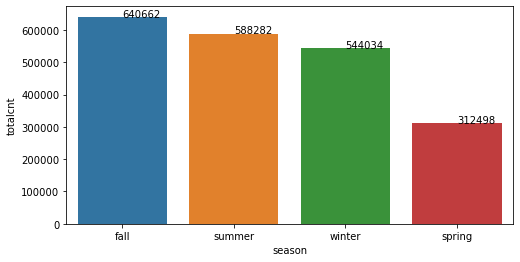

In [54]:
seasoncnt=yl.groupby('season').totalcount.sum()
seasoncnt=seasoncnt.sort_values(ascending=False)
seasoncnt=seasoncnt.reset_index(name='totalcnt')
plt.figure(figsize=(8,4))

sns.barplot(data=seasoncnt, x='season', y='totalcnt')
index=0
for i in range(len(seasoncnt)):
    index = index
    value = seasoncnt.iloc[i, 1] 
    plt.text(index, value, value)
    index+=1


([<matplotlib.patches.Wedge at 0x17c033837c0>,
 [Text(0.6262654888309607, 0.9043182722356758, 'fall'),
  Text(-1.042349085816661, 0.35143759516757916, 'summer'),
  Text(-0.2080129492436872, -1.0801530507048265, 'winter'),
  Text(0.9803503002409232, -0.4989121053026595, 'spring')],
 [Text(0.3415993575441603, 0.4932645121285504, '30.7%'),
  Text(-0.5685540468090877, 0.19169323372777042, '28.2%'),
  Text(-0.11346160867837483, -0.5891743912935417, '26.1%'),
  Text(0.5347365274041398, -0.2721338756196324, '15.0%')])

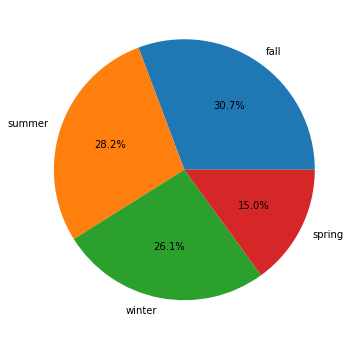

In [55]:
plt.figure(figsize=(10,6))
plt.pie(x=seasoncnt.totalcnt, labels=seasoncnt.season, autopct='%1.1f%%')
  

<br>
<font size="4">
The above graphs show the count of total rental bikes in each season<br><br>
<li>Highest number of services are booked in the fall season ( 30% of all the bookings ).<br><br>
<li>Spring season has the lowest number of bookings ( 15% ) by a large margin. <br><br>  
    <hr>

<font size="4">
    <br>
b. Distribution of  the column holiday.<br><br>

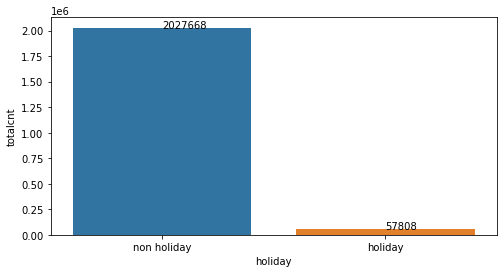

In [56]:
holidaycnt=yl.groupby('holiday').totalcount.sum()
holidaycnt=holidaycnt.sort_values(ascending=False)
holidaycnt=holidaycnt.reset_index(name='totalcnt')
plt.figure(figsize=(8,4))

sns.barplot(data=holidaycnt, x='holiday', y='totalcnt')
index=0
for i in range(len(holidaycnt)):
    index = index
    value = holidaycnt.iloc[i, 1] 
    plt.text(index, value, value)
    index+=1

([<matplotlib.patches.Wedge at 0x17c035f93a0>,
 [Text(-1.095831756579612, 0.09567006465787449, 'non holiday'),
  Text(1.0958317604984202, -0.09567001977073628, 'holiday')],
 [Text(-0.5977264126797883, 0.052183671631567896, '97.2%'),
  Text(0.5977264148173201, -0.052183647147674324, '2.8%')])

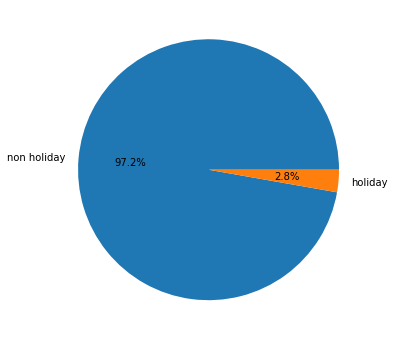

In [57]:
plt.figure(figsize=(10,6))
plt.pie(x=holidaycnt.totalcnt, labels=holidaycnt.holiday, autopct='%1.1f%%')

<br>
<font size="4"><ul>
The above graphs show the count of total rental bikes including both casual and registered booked for holidays and non holidays.
    97% of the services are booked during non holidays.<br><hr><br>

<font size="4">
    <br>
c. Distribution of  the column workingday.<br><br>

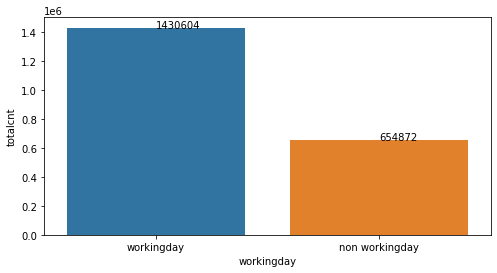

In [58]:
workingdaycnt=yl.groupby('workingday').totalcount.sum()
workingdaycnt=workingdaycnt.sort_values(ascending=False)
workingdaycnt=workingdaycnt.reset_index(name='totalcnt')
plt.figure(figsize=(8,4))

sns.barplot(data=workingdaycnt, x='workingday', y='totalcnt')
index=0
for i in range(len(workingdaycnt)):
    index = index
    value = workingdaycnt.iloc[i, 1] 
    plt.text(index, value, value)
    index+=1

([<matplotlib.patches.Wedge at 0x17c03655c70>,
 [Text(-0.6067654144600506, 0.9175160662435963, 'workingday'),
  Text(0.6067653285559936, -0.9175161230530706, 'non workingday')],
 [Text(-0.3309629533418457, 0.5004633088601433, '68.6%'),
  Text(0.33096290648508736, -0.5004633398471293, '31.4%')])

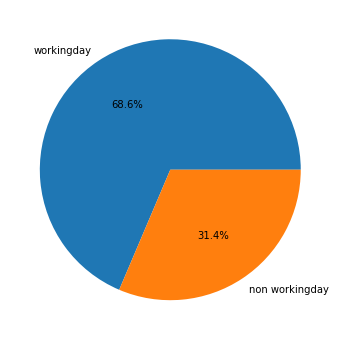

In [59]:
plt.figure(figsize=(10,6))
plt.pie(x=workingdaycnt.totalcnt, labels=workingdaycnt.workingday, autopct='%1.1f%%')

<br>
<font size="4"><ul>
    
   We can see that 68% of the total bookings are during working days.<br><hr>

<font size="4">
    <br>
d. Distribution of  the column weather.<br><br>

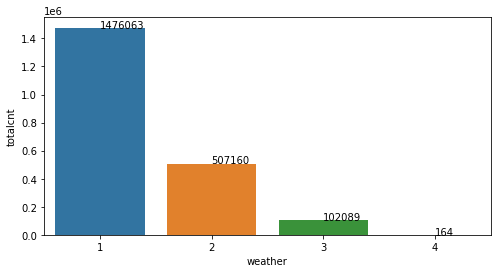

In [60]:
weathercnt=yl.groupby('weather').totalcount.sum()
weathercnt=weathercnt.sort_values(ascending=False)
weathercnt=weathercnt.reset_index(name='totalcnt')
plt.figure(figsize=(8,4))

sns.barplot(data=weathercnt, x='weather', y='totalcnt')
index=0
for i in range(len(weathercnt)):
    index = index
    value = weathercnt.iloc[i, 1] 
    plt.text(index, value, value)
    index+=1


([<matplotlib.patches.Wedge at 0x17c03716430>,
 [Text(-0.6681259157053644, 0.8738465315848479, '1'),
  Text(0.5261436548074552, -0.9660087238249216, '2'),
  Text(1.086934270255328, -0.1690381381360958, '3'),
  Text(1.0999999664724138, -0.00027158919116389594, '4')],
 [Text(-0.3644323176574714, 0.4766435626826443, '70.8%'),
  Text(0.2869874480767937, -0.5269138493590481, '24.3%'),
  Text(0.592873238321088, -0.0922026208015068, '4.9%'),
  Text(0.5999999817122256, -0.0001481395588166705, '0.0%')])

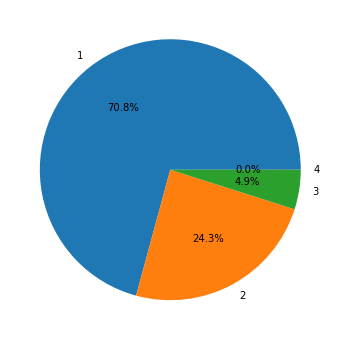

In [61]:
plt.figure(figsize=(10,6))
plt.pie(x=weathercnt.totalcnt, labels=weathercnt.weather, autopct='%1.1f%%')

<br>
<font size="4">
<li>Weather 1 which represents Clear sky, Few clouds or partly cloudy weather is having more than 70% of all the service bookings.<br><br>
<li>24.3% bookings are in the weather Misty or Cloudy weather.<br><br>
<li>Only a total of 164 bookings are recorded in the extreme weather of  Heavy Rain ,Ice Pellets, Thunderstorm etc.<br><hr><br>



<font size="4">
e. Outliers and distribution of the column temp.
    
<br><br>

<AxesSubplot:ylabel='temp'>

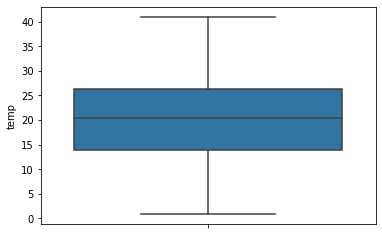

In [62]:

sns.boxplot(data=yl,y='temp')

<br>
<font size="4"><ul>
We have no outliers for the column temp. Median value of atemp is 20.
<br><br>

<AxesSubplot:xlabel='temp', ylabel='Count'>

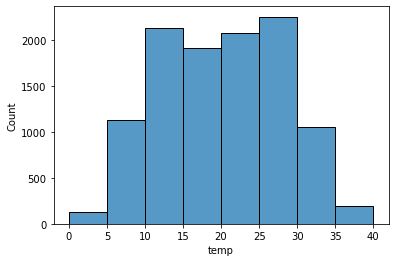

In [63]:
bins=[0,5,10,15,20,25,30,35,40]
sns.histplot(yl.temp,bins=bins)

In [64]:
(yl[(yl['temp']>=10) & (yl['temp']<=30)].totalcount.sum()/yl.totalcount.sum())*100

75.64210760517024

<br>
<font size="4">
<ul>75% of the total bookings are when temperature values lie between 10 and 30.<br><hr><br>
    

<font size="4">
f. Outliers and distribution of the column atemp.
    
<br><br>

<AxesSubplot:ylabel='atemp'>

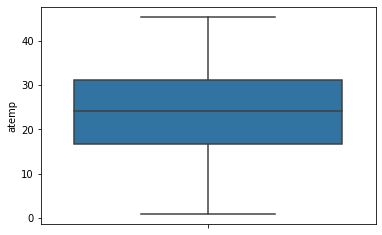

In [65]:
sns.boxplot(data=yl,y='atemp')

<br>
<font size="4"><ul>
We have no outliers for the column atemp. Median value is 24.<br><br>

<AxesSubplot:xlabel='atemp', ylabel='Count'>

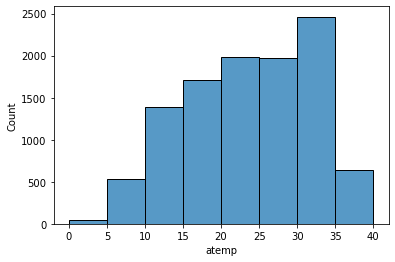

In [66]:
bins=[0,5,10,15,20,25,30,35,40]
sns.histplot(yl.atemp,bins=bins)

<br>
<font size="4"><ul>
Most of the values are concentrated between the range of 10 to 35. Highest number of atemp values are in the range 30 to 35.<br><hr><br>

<font size="4">
f. Outliers and distribution of the column humidity.
    
<br><br>

<AxesSubplot:ylabel='humidity'>

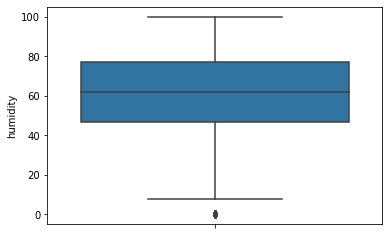

In [67]:
sns.boxplot(data=yl,y='humidity')

In [68]:
yl[yl.humidity<2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,totalcount,date_numeric,year_month,hour
1091,2011-10-03 00:00:00,spring,non holiday,workingday,3,13.94,15.910,0,16.9979,3,0,3,1.317600e+09,2011-10,0
1092,2011-10-03 01:00:00,spring,non holiday,workingday,3,13.94,15.910,0,16.9979,0,2,2,1.317604e+09,2011-10,1
1093,2011-10-03 02:00:00,spring,non holiday,workingday,3,13.94,15.910,0,16.9979,0,1,1,1.317607e+09,2011-10,2
1094,2011-10-03 05:00:00,spring,non holiday,workingday,3,14.76,17.425,0,12.9980,1,2,3,1.317618e+09,2011-10,5
1095,2011-10-03 06:00:00,spring,non holiday,workingday,3,14.76,16.665,0,22.0028,0,12,12,1.317622e+09,2011-10,6
1096,2011-10-03 07:00:00,spring,non holiday,workingday,3,15.58,19.695,0,15.0013,1,36,37,1.317625e+09,2011-10,7
1097,2011-10-03 08:00:00,spring,non holiday,workingday,3,15.58,19.695,0,19.0012,1,43,44,1.317629e+09,2011-10,8
1098,2011-10-03 09:00:00,spring,non holiday,workingday,3,16.40,20.455,0,15.0013,1,23,24,1.317632e+09,2011-10,9
1099,2011-10-03 10:00:00,spring,non holiday,workingday,3,16.40,20.455,0,11.0014,0,17,17,1.317636e+09,2011-10,10
1100,2011-10-03 11:00:00,spring,non holiday,workingday,3,16.40,20.455,0,16.9979,6,5,11,1.317640e+09,2011-10,11


<br>
<font size="4"><ul>
 We have many outliers for the column where humidity is 0. All the values are recorded on working day in spring season on the date 2011-10-03.<br><br>

In [69]:
lowerlimit = yl['humidity'].quantile(0.25)-(1.5*(yl['humidity'].quantile(0.75)-yl['humidity'].quantile(0.25)))
upperlimit = yl['humidity'].quantile(0.75)+(1.5*(yl['humidity'].quantile(0.75)-yl['humidity'].quantile(0.25)))
yl['humidity'] = np.clip(yl['humidity'],lowerlimit, upperlimit)

<br>
<font size="4"><ul>
The above code clips the column values which are outliers.<br><br>

<AxesSubplot:xlabel='humidity', ylabel='Count'>

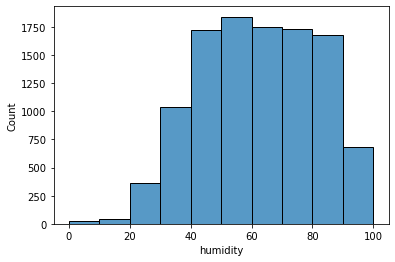

In [70]:
bins=[0,10,20,30,40,50,60,70,80,90,100]
sns.histplot(yl.humidity,bins=bins)

In [71]:
(yl[(yl['humidity']>=40) & (yl['humidity']<=90)].totalcount.sum()/yl.totalcount.sum())*100

77.01287379955464

<br>
<font size="4"><ul>
    Almost 77% of the humidity values lie between the intervals of 40 to 90.<br><hr><br>

<font size="4">
g. Outliers and distribution of the column windspeed.
    
<br><br>

<AxesSubplot:ylabel='windspeed'>

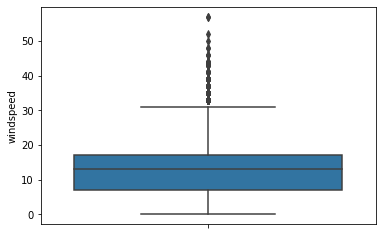

In [72]:
sns.boxplot(data=yl,y='windspeed')

In [73]:
lowerlimit = yl['windspeed'].quantile(0.25)-(1.5*(yl['windspeed'].quantile(0.75)-yl['windspeed'].quantile(0.25)))
upperlimit = yl['windspeed'].quantile(0.75)+(1.5*(yl['windspeed'].quantile(0.75)-yl['windspeed'].quantile(0.25)))
yl[yl.windspeed>upperlimit]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,totalcount,date_numeric,year_month,hour
175,2011-08-01 14:00:00,spring,non holiday,non workingday,1,8.20,8.335,32,32.9975,12,83,95,1.312207e+09,2011-08,14
178,2011-08-01 17:00:00,spring,non holiday,non workingday,1,6.56,6.060,37,36.9974,5,64,69,1.312218e+09,2011-08,17
194,2011-09-01 09:00:00,spring,non holiday,non workingday,1,4.92,3.790,46,35.0008,0,19,19,1.314868e+09,2011-09,9
196,2011-09-01 11:00:00,spring,non holiday,non workingday,1,6.56,6.060,40,35.0008,2,47,49,1.314875e+09,2011-09,11
265,2011-12-01 12:00:00,spring,non holiday,workingday,1,8.20,7.575,47,39.0007,3,52,55,1.322741e+09,2011-12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10013,2012-02-11 14:00:00,winter,non holiday,workingday,2,16.40,20.455,40,32.9975,63,199,262,1.328969e+09,2012-02,14
10154,2012-08-11 12:00:00,winter,non holiday,workingday,1,16.40,20.455,24,32.9975,33,202,235,1.344686e+09,2012-08,12
10263,2012-11-13 01:00:00,winter,non holiday,workingday,3,18.04,21.970,88,43.0006,0,5,5,1.352768e+09,2012-11,1
10540,2012-05-12 14:00:00,winter,non holiday,workingday,1,19.68,23.485,33,32.9975,39,179,218,1.336831e+09,2012-05,14


<br>
<font size="4"><ul>
    There are many outliers in the column windspeed above upper limit.<br><br>

In [74]:
yl['windspeed'] = np.clip(yl['windspeed'],lowerlimit, upperlimit)

<br>
<font size="4"><ul>
The above code clips the column values which are outliers.<br><br>

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

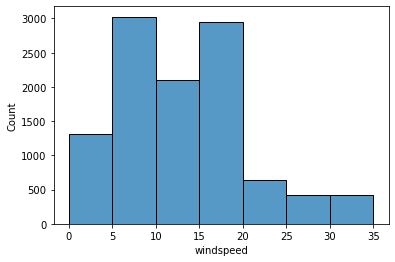

In [75]:
bins=[0,5,10,15,20,25,30,35]
sns.histplot(yl.windspeed,bins=bins)

In [76]:
(yl[(yl['windspeed']>=5) & (yl['windspeed']<=20)].totalcount.sum()/yl.totalcount.sum())*100

74.97986071285403

<br>
<font size="4"><ul>
   75 % of the total bookings happen when windspeed values lie between the range 5 to 20.<br><hr><br>

<font size="4">
h. Outliers and distribution of the column casual users.
    
<br><br>

In [77]:
cu=yl['casual'].sum()/yl['totalcount'].sum()
print(f" {cu*100} % are Casual Users")

 18.8031413451893 % are Casual Users


<AxesSubplot:ylabel='casual'>

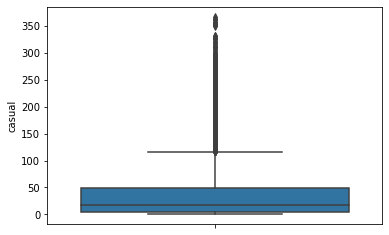

In [78]:
sns.boxplot(data=yl,y='casual')

In [79]:
lowerlimit = yl['casual'].quantile(0.25)-(1.5*(yl['casual'].quantile(0.75)-yl['casual'].quantile(0.25)))
upperlimit = yl['casual'].quantile(0.75)+(1.5*(yl['casual'].quantile(0.75)-yl['casual'].quantile(0.25)))
yl[(yl.casual>upperlimit) | (yl.casual<lowerlimit)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,totalcount,date_numeric,year_month,hour
1173,2011-03-13 14:00:00,spring,non holiday,non workingday,1,18.86,22.725,41,19.9995,144,106,250,1.300025e+09,2011-03,14
1174,2011-03-13 15:00:00,spring,non holiday,non workingday,1,19.68,23.485,39,22.0028,149,155,304,1.300028e+09,2011-03,15
1175,2011-03-13 16:00:00,spring,non holiday,non workingday,1,18.86,22.725,41,26.0027,124,132,256,1.300032e+09,2011-03,16
1311,2011-03-19 12:00:00,spring,non holiday,non workingday,1,18.86,22.725,33,27.9993,126,141,267,1.300536e+09,2011-03,12
1312,2011-03-19 13:00:00,spring,non holiday,non workingday,1,20.50,24.240,34,31.0009,174,127,301,1.300540e+09,2011-03,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,2012-08-12 12:00:00,winter,non holiday,non workingday,2,16.40,20.455,87,15.0013,122,364,486,1.344773e+09,2012-08,12
10611,2012-08-12 13:00:00,winter,non holiday,non workingday,2,16.40,20.455,87,11.0014,148,399,547,1.344776e+09,2012-08,13
10612,2012-08-12 14:00:00,winter,non holiday,non workingday,2,16.40,20.455,87,19.0012,164,378,542,1.344780e+09,2012-08,14
10613,2012-08-12 15:00:00,winter,non holiday,non workingday,1,17.22,21.210,82,11.0014,167,374,541,1.344784e+09,2012-08,15


<br>
<font size="4"><ul>
About 7% of all the values in the column casual are outliers.<br><br>

<AxesSubplot:xlabel='casual', ylabel='Count'>

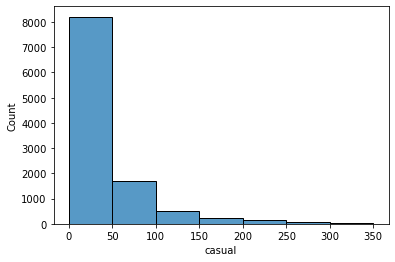

In [80]:
bins=[0,50,100,150,200,250,300,350]
sns.histplot(yl.casual,bins=bins)

<br>
<font size="4"><ul>
A large number of values for count of casual users are located in the range 0-50.<br><hr><br>

<font size="4">
i. Outliers and distribution of the column registered users.
    
<br><br>

In [81]:
cu=yl['registered'].sum()/yl['totalcount'].sum()
print(f" {cu*100} % are Registered Users")

 81.1968586548107 % are Registered Users


<AxesSubplot:ylabel='registered'>

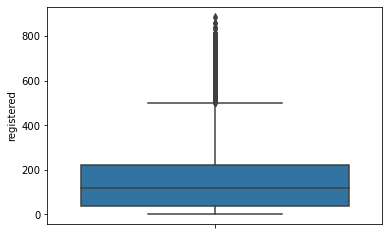

In [82]:
sns.boxplot(data=yl,y='registered')

In [83]:
lowerlimit = yl['registered'].quantile(0.25)-(1.5*(yl['registered'].quantile(0.75)-yl['registered'].quantile(0.25)))
upperlimit = yl['registered'].quantile(0.75)+(1.5*(yl['registered'].quantile(0.75)-yl['registered'].quantile(0.25)))
yl[(yl.registered>upperlimit) | (yl.registered<lowerlimit)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,totalcount,date_numeric,year_month,hour
1987,2011-09-05 17:00:00,summer,non holiday,workingday,1,25.42,31.060,38,16.9979,59,539,598,1.315242e+09,2011-09,17
2011,2011-10-05 17:00:00,summer,non holiday,workingday,1,26.24,31.060,33,0.0000,79,532,611,1.317834e+09,2011-10,17
2059,2011-12-05 17:00:00,summer,non holiday,workingday,2,26.24,31.060,57,12.9980,54,540,594,1.323104e+09,2011-12,17
2179,2011-05-17 17:00:00,summer,non holiday,workingday,1,25.42,30.305,65,27.9993,83,521,604,1.305652e+09,2011-05,17
2371,2011-06-06 17:00:00,summer,non holiday,workingday,1,31.98,34.090,33,19.0012,63,516,579,1.307380e+09,2011-06,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10855,2012-12-18 17:00:00,winter,non holiday,workingday,1,16.40,20.455,47,30.0026,39,533,572,1.355850e+09,2012-12,17
10856,2012-12-18 18:00:00,winter,non holiday,workingday,1,15.58,19.695,46,22.0028,13,512,525,1.355854e+09,2012-12,18
10870,2012-12-19 08:00:00,winter,non holiday,workingday,1,9.84,12.880,87,7.0015,13,665,678,1.355904e+09,2012-12,8
10879,2012-12-19 17:00:00,winter,non holiday,workingday,1,16.40,20.455,50,26.0027,26,536,562,1.355936e+09,2012-12,17


<br>
<font size="4"><ul>
3.8% of all the values in the column registered are outliers.<br><br>

<AxesSubplot:xlabel='registered', ylabel='Count'>

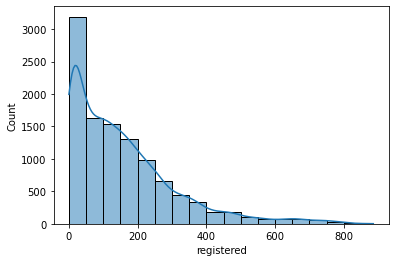

In [84]:
bins=[i for i in range(0,900,50)]
sns.histplot(yl.registered,kde=True,bins=bins)

<br><font size='4'><ul>
Number of registered users mostly lie below 50<br><hr><br>

<font size="4">
j. Outliers and distribution of the column count.
    
<br><br>

<AxesSubplot:ylabel='totalcount'>

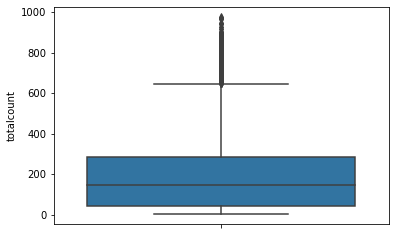

In [85]:
sns.boxplot(data=yl,y='totalcount')

In [86]:
lowerlimit = yl['totalcount'].quantile(0.25)-(1.5*(yl['totalcount'].quantile(0.75)-yl['totalcount'].quantile(0.25)))
upperlimit = yl['totalcount'].quantile(0.75)+(1.5*(yl['totalcount'].quantile(0.75)-yl['totalcount'].quantile(0.25)))
yl[(yl.totalcount>upperlimit) | (yl.totalcount<lowerlimit)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,totalcount,date_numeric,year_month,hour
6611,2012-12-03 18:00:00,spring,non holiday,workingday,2,24.60,31.060,43,12.9980,89,623,712,1.354558e+09,2012-12,18
6634,2012-03-13 17:00:00,spring,non holiday,workingday,1,28.70,31.820,37,7.0015,62,614,676,1.331658e+09,2012-03,17
6635,2012-03-13 18:00:00,spring,non holiday,workingday,1,28.70,31.820,34,19.9995,96,638,734,1.331662e+09,2012-03,18
6649,2012-03-14 08:00:00,spring,non holiday,workingday,1,18.04,21.970,82,0.0000,34,628,662,1.331712e+09,2012-03,8
6658,2012-03-14 17:00:00,spring,non holiday,workingday,1,28.70,31.820,28,6.0032,140,642,782,1.331744e+09,2012-03,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2012-11-12 08:00:00,winter,non holiday,workingday,2,13.94,15.150,61,19.9995,16,708,724,1.352707e+09,2012-11,8
10702,2012-12-12 08:00:00,winter,non holiday,workingday,2,10.66,12.880,65,11.0014,18,670,688,1.355299e+09,2012-12,8
10726,2012-12-13 08:00:00,winter,non holiday,workingday,1,9.84,11.365,60,12.9980,24,655,679,1.355386e+09,2012-12,8
10846,2012-12-18 08:00:00,winter,non holiday,workingday,1,15.58,19.695,94,0.0000,10,652,662,1.355818e+09,2012-12,8


<br>
<font size="4"><ul>We have many outliers for the column.<br><br>

<AxesSubplot:xlabel='totalcount', ylabel='Count'>

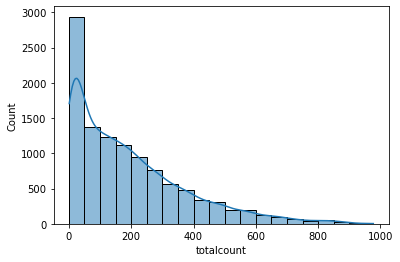

In [87]:
bins=[i for i in range(0,1000,50)]
sns.histplot(yl.totalcount,kde=True,bins=bins)

<br><font size='4'><ul>
Number of total users mostly lie below 50<br><hr><br>

<font size='4'>
3. Correlation between different variables.<br><br>

<AxesSubplot:>

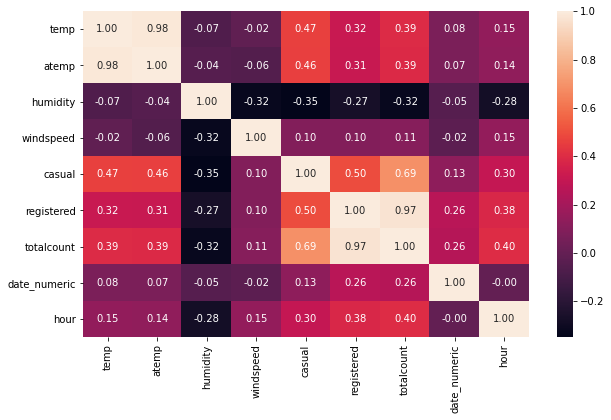

In [88]:
plt.figure(figsize=(10,6))
sns.heatmap(yl.corr(),annot=True,fmt='0.2f')

<br>
<font size="4">
<li>Columns temp and atemp have very high correlation which is near to 1. Similar is the case with columns registered and total count.<br><br>
<li>Column casual users has high correlation with temp and atemp. It has also high correlation with registered and totalcount.<br><br>
<li>Humidity has negative correlation with windspeed and different count of users.<br><br>

In [89]:
yl.drop(['atemp','registered'],axis=1,inplace=True)

<br>
<font size="4"><ul>Removing columns atemp and registered as they are very highly correlated with temp and totalcount.<br><br>

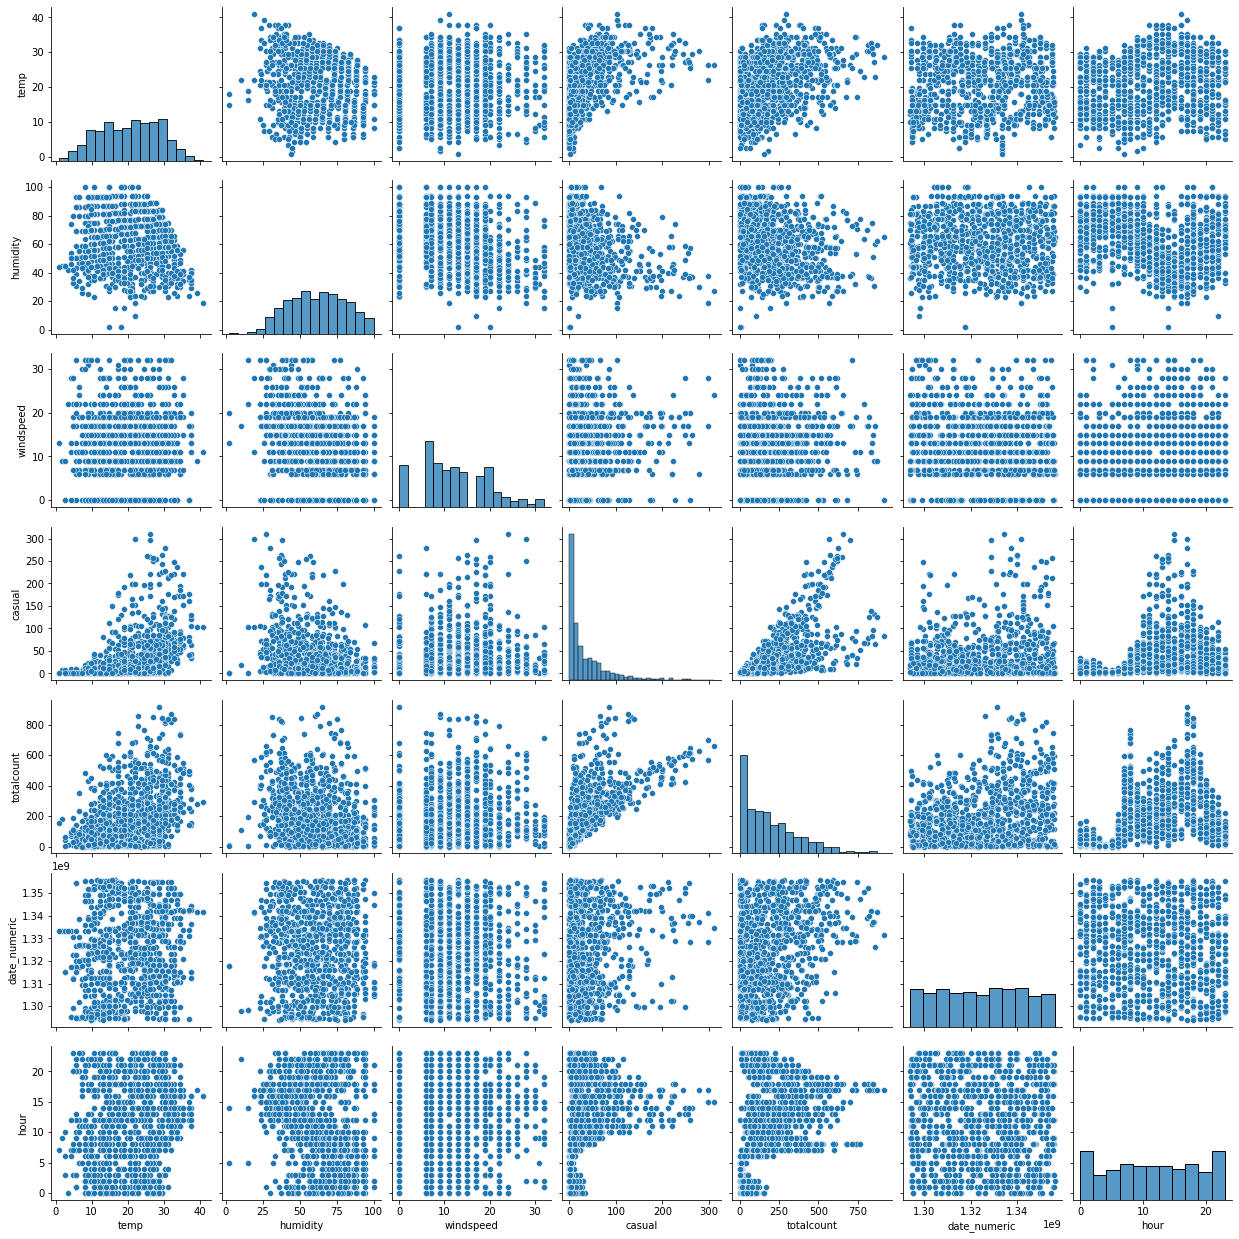

In [90]:
ylcopy=yl.sample(n=1000, random_state=1)
sns.pairplot(ylcopy)

<br><hr><br>

<br>
<font size="4">
4. Check if there any significant difference between the no. of bike rides on Weekdays
and Weekends?
<br><br>
<ul>H<sub>0</sub>: There is no significant difference between the mean no: of bike rides on Weekdays and Weekends.<br><br>
H<sub>1</sub>:  There is a significant difference between the mean no: of bike rides on Weekdays and Weekends.<br><br>
</ul>
Applying T Test_ind to find if there is any significant difference in the mean of weekday and weekend  total count of rides.<br>Significance level for the test, alpha=0.05<br><br>
    


In [91]:
weekdaybikes=yl[yl.workingday=='workingday'].totalcount
weekendbikes=yl[yl.workingday=='non workingday'].totalcount
print(f'Mean of count of weekday bike rides is {weekdaybikes.mean()}.\nMean of count of weekend bike rides is {weekendbikes.mean()} ')

Mean of count of weekday bike rides is 193.01187263896384.
Mean of count of weekend bike rides is 188.50662061024755 


<br><br>
<font size='4'>
<ul>Checking weather data follows normal distribution.<br><br>

<AxesSubplot:title={'center':'weekend bikes'}, xlabel='totalcount', ylabel='Count'>

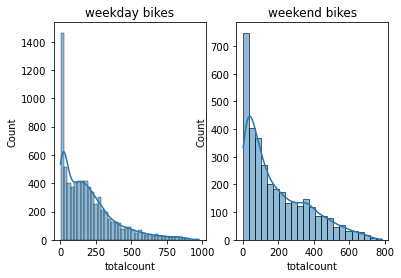

In [92]:
weekdayb=yl[yl.workingday=='workingday']
weekendb=yl[yl.workingday=='non workingday']

plt.subplot(1,2,1)
plt.title('weekday bikes')
sns.histplot(weekdayb.totalcount,kde=True)

plt.subplot(1,2,2)
plt.title('weekend bikes')
sns.histplot(weekendb.totalcount,kde=True)

Text(0.5, 1.0, 'weekend')

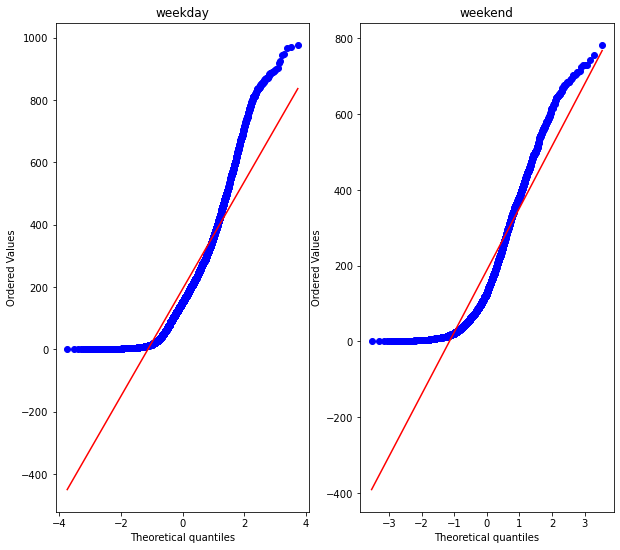

In [93]:
from scipy.stats import probplot

fig,axs=plt.subplots(1,2,figsize=(10,9))

probplot(weekdayb.totalcount,dist='norm', plot=axs[0])
axs[0].set_title('weekday')

probplot(weekendb.totalcount,dist='norm',plot=axs[1])
axs[1].set_title('weekend')

<br>
<font size='4'>
From the above histogram and qq plot, we can see that data is not following normal distribution.
 <br><br>
    
<ul>Checking variance of both data are similar using levenes test.

In [94]:
from scipy.stats import levene

levene(weekdayb.totalcount,weekendb.totalcount)

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

<br>
<font size="4">
As p value is very high, we can say that variance of both weekday and weekend total counts are similar.
<br><br>
Proceeding with ttest_ind even though the data is not normal.<br><br>

In [95]:
from scipy.stats import ttest_ind

ttest_ind(weekdayb.totalcount,weekendb.totalcount,alternative='two-sided')

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

<br>
<font size="4">
<ul>As alpha < p value, we fail to reject the null hypothesis. So there is no significant between the no. of bike rides on Weekdays and Weekends.<br><br>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

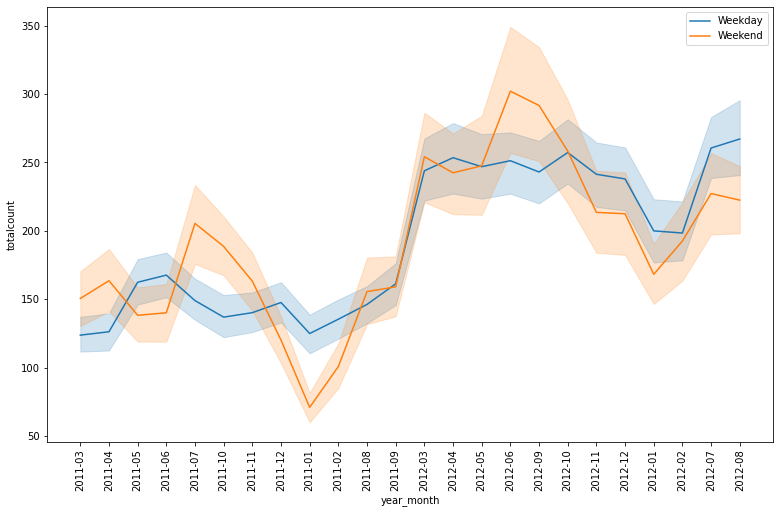

In [96]:
plt.figure(figsize=(13,8))


sns.lineplot(data=weekdayb,x='year_month', y='totalcount')
sns.lineplot(data=weekendb,x='year_month', y='totalcount')

plt.legend(['Weekday','Weekend'])
plt.xticks(rotation=90)


<br>
<hr><br>

<br>
<font size="4">

5. Check if the demand of bicycles on rent is the same for different Weather
conditions.<br><br>

<br>

<font size="4">
<ul>H<sub>0</sub>: There is no significant difference between the no: of bike rides on different weather conditions.<br><br>
H<sub>1</sub>:  There is a significant difference between the  no: of bike rides on different weather conditions.<br><br>
</ul>
Applying One-way ANOVA test to find if there is any significant difference in the mean no: of bike rides on different weather conditions.<br>Significance level for the test, alpha=0.05. Checking conditions for anova test.<br><br>


In [97]:
yl.groupby('weather').totalcount.mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: totalcount, dtype: float64

<AxesSubplot:title={'center':'weather 4'}, xlabel='totalcount', ylabel='Count'>

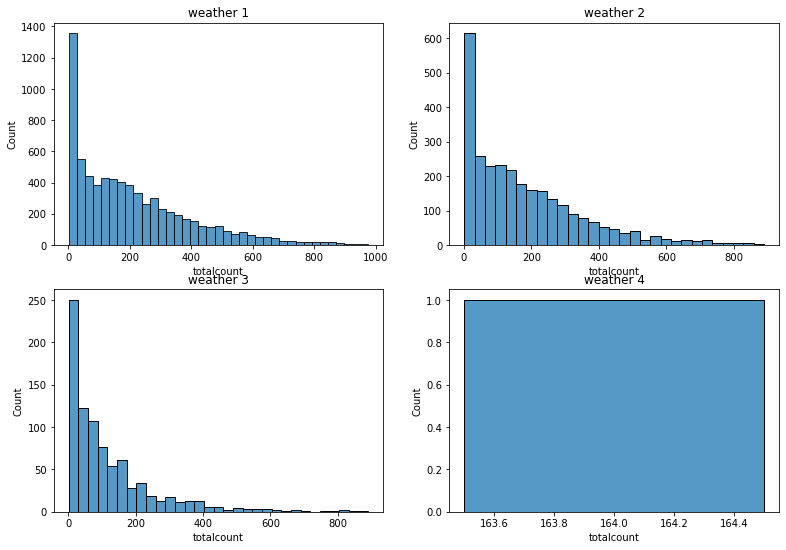

In [98]:
w1=yl[yl.weather=='1']
w2=yl[yl.weather=='2']
w3=yl[yl.weather=='3']
w4=yl[yl.weather=='4']

plt.figure(figsize=(13,9))
plt.subplot(2,2,1)
plt.title('weather 1')
sns.histplot(w1.totalcount)

plt.subplot(2,2,2)
plt.title('weather 2')
sns.histplot(w2.totalcount)

plt.subplot(2,2,3)
plt.title('weather 3')
sns.histplot(w3.totalcount)

plt.subplot(2,2,4)
plt.title('weather 4')
sns.histplot(w4.totalcount)

C:\Users\devip\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\devip\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:174: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\devip\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:176: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Text(0.5, 1.0, 'weather 4')

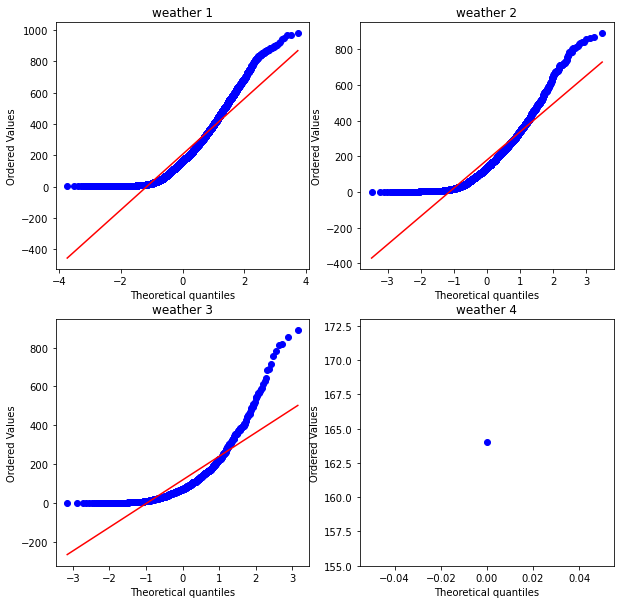

In [99]:
from statsmodels.graphics.gofplots import qqplot


fig, axs = plt.subplots(2, 2, figsize=(10, 10))

probplot(w1.totalcount, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title('weather 1')

probplot(w2.totalcount, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('weather 2')

probplot(w3.totalcount, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('weather 3')


probplot(w4.totalcount, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('weather 4')


In [100]:
from scipy.stats import shapiro
print(f'Outcome for weather1: {shapiro(w1.totalcount.sample(1000))}')
print(f'Outcome for weather2: {shapiro(w2.totalcount.sample(1000))}')
print(f'Outcome for weather3: {shapiro(w3.totalcount.sample(500))}')
#print(f'Outcome for weather4: {shapiro(w4.totalcount)}')

Outcome for weather1: ShapiroResult(statistic=0.9056045413017273, pvalue=2.251817456234446e-24)
Outcome for weather2: ShapiroResult(statistic=0.8696394562721252, pvalue=4.654160414629904e-28)
Outcome for weather3: ShapiroResult(statistic=0.7688576579093933, pvalue=6.236522926606623e-26)


<br>
<font size="4"><ul>
The data is not following a normal distribution.<br><br>

In [101]:

from scipy.stats import levene


levene(w1.totalcount,w2.totalcount,w3.totalcount)

LeveneResult(statistic=81.67574924435011, pvalue=6.198278710731511e-36)

<br>
<font size="4"><ul>
Total count column for different weather conditions is not having equal variance as p value is extremely low.</ul><br><br>
    

As the conditions for Anova test are not met, doing Kruskal-Wallis test to compare total count based on different weather.<br><br>

In [102]:
from scipy.stats import kruskal

kruskal(w1.totalcount,w2.totalcount,w3.totalcount,w4.totalcount)

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

<br>
<font size="4"><ul>
P value << alpha. So rejecting null hypothesis. <br><br>
We can use Anova test to realise the same.<br><br>



In [103]:
from scipy.stats import f_oneway

f_oneway(w1.totalcount,w2.totalcount,w3.totalcount,w4.totalcount)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

<br>
<font size="4"><ul>
    
As p value is extremely small for both the tests, we can say that there is a significant difference between the no: of bike rides rented hourly based on different weather conditions.<br><br><hr><br>

<font size='4'>

6. Check if the demand of bicycles on rent is the same for different Seasons?<br><br>


<font size="4">
<ul>H<sub>0</sub>: There is no significant difference in the demand of bicycles on rent based on different Seasons .<br><br>
H<sub>1</sub>:  There is a significant difference in the demand of bicycles on rent based on different Seasons.<br><br>
</ul>
Applying One-way ANOVA test to find if there is any significant difference in the mean no: of bike rides based on different Seasons.<br>Significance level for the test, alpha=0.05. Checking conditions for anova test.<br><br>


In [104]:
yl.groupby('season').totalcount.mean()

season
fall      234.417124
spring    116.343261
summer    215.251372
winter    198.988296
Name: totalcount, dtype: float64

<AxesSubplot:title={'center':'winter'}, xlabel='totalcount', ylabel='Count'>

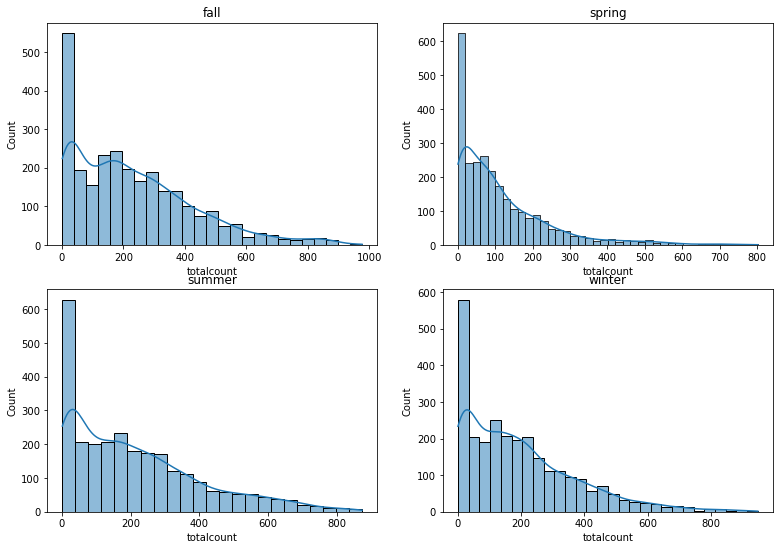

In [105]:
fall=yl[yl.season=='fall']
spring=yl[yl.season=='spring']
summer=yl[yl.season=='summer']
winter=yl[yl.season=='winter']

plt.figure(figsize=(13,9))
plt.subplot(2,2,1)
plt.title('fall')
sns.histplot(fall.totalcount,kde=True)

plt.subplot(2,2,2)
plt.title('spring')
sns.histplot(spring.totalcount,kde=True)

plt.subplot(2,2,3)
plt.title('summer')
sns.histplot(summer.totalcount,kde=True)

plt.subplot(2,2,4)
plt.title('winter')
sns.histplot(winter.totalcount,kde=True)

Text(0.5, 1.0, 'winter')

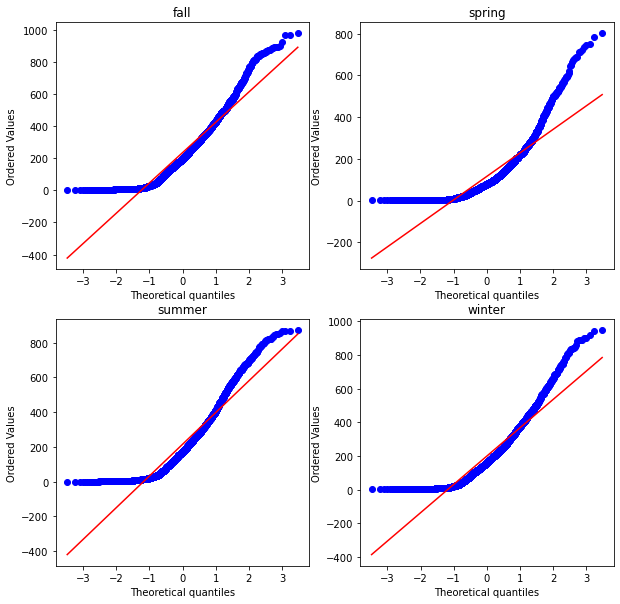

In [106]:
fig,axs=plt.subplots(2,2,figsize=(10,10))

probplot(fall.totalcount, dist='norm', plot=axs[0,0])
axs[0,0].set_title('fall')

probplot(spring.totalcount, dist='norm', plot=axs[0,1])
axs[0,1].set_title('spring')

probplot(summer.totalcount, dist='norm', plot=axs[1,0])
axs[1,0].set_title('summer')

probplot(winter.totalcount, dist='norm', plot=axs[1,1])
axs[1,1].set_title('winter')

In [107]:
from scipy.stats import shapiro

print(f"Outcome for fall is {shapiro(fall.totalcount.sample(1000))}")
print(f"Outcome for spring is {shapiro(spring.totalcount.sample(1000))}")
print(f"Outcome for summer is {shapiro(summer.totalcount.sample(1000))}")
print(f"Outcome for winter is {shapiro(winter.totalcount.sample(1000))}")

Outcome for fall is ShapiroResult(statistic=0.9118629693984985, pvalue=1.2593003148600968e-23)
Outcome for spring is ShapiroResult(statistic=0.8131280541419983, pvalue=1.7075883339409255e-32)
Outcome for summer is ShapiroResult(statistic=0.8927491903305054, pvalue=8.473615357272794e-26)
Outcome for winter is ShapiroResult(statistic=0.897013247013092, pvalue=2.428653989471318e-25)


<br>
<font size='4'>
<ul>From QQ plot and shapiro test, we can see that the data is not following normal distribution.</ul><br>
    


In [108]:
from scipy.stats import levene

levene(fall.totalcount,spring.totalcount,summer.totalcount,winter.totalcount )

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

    
<br>
<font size="4"><ul>
    
    
Total count column for different seasons is not having equal variance as p value is extremely low.</ul><br><br>
As the conditions for Anova test are not met, doing Kruskal-Wallis test to compare total count based on different seasons.<br><br>

In [109]:
from scipy.stats import kruskal

kruskal(fall.totalcount,spring.totalcount,summer.totalcount,winter.totalcount)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

<br>
<font size="4"><ul>
P value << alpha. So rejecting null hypothesis. <br><br>
We can use Anova  to test the same.<br><br>

In [110]:
from scipy.stats import f_oneway

f_oneway(fall.totalcount,spring.totalcount,summer.totalcount,winter.totalcount)

F_onewayResult(statistic=236.94671081032115, pvalue=6.164843386499654e-149)

<br>
<font size="4"><ul>
    
As p value is extremely small for both the tests, we can say that there is a significant difference in the no: of bike rides rented hourly based on different Seasons.<br><br><hr><br>

<br>
<font size="4">

6. Check if the Weather conditions are significantly different during different Seasons?<br><br>

<font size="4">
<ul>H<sub>0</sub>: There is no significant difference in Weather conditions during different Seasons .<br><br>
H<sub>1</sub>:  There is a significant difference in Weather conditions during different Seasons.<br><br>
</ul>
Applying Chi-square test to find if there is any association between Weather conditions and Seasons.<br>Significance level for the test, alpha=0.05.<br><br>

In [111]:
cont=pd.crosstab(index=yl.weather, columns=yl.season,values=yl.totalcount,aggfunc='sum')
cont=cont.replace(np.nan,0)
cont

season,fall,spring,summer,winter
weather,,,,
1,470116.0,223009.0,426350.0,356588.0
2,139386.0,76406.0,134177.0,157191.0
3,31160.0,12919.0,27755.0,30255.0
4,0.0,164.0,0.0,0.0


In [112]:
from scipy.stats import chi2_contingency

# Performing the chi-squared test
chi2, p, dof, expected = chi2_contingency(cont)

print(f"Chi-square: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square: 11769.559450959445
P-value: 0.0
Degrees of freedom: 9
Expected frequencies:
[[4.53449224e+05 2.21180553e+05 4.16375587e+05 3.85057636e+05]
 [1.55800469e+05 7.59953534e+04 1.43062351e+05 1.32301826e+05]
 [3.13619255e+04 1.52975188e+04 2.87978002e+04 2.66317555e+04]
 [5.03810967e+01 2.45745681e+01 4.62619795e+01 4.27823557e+01]]


<br>
<font size='4'>
As P value < alpha , we can reject the null hypothesis. So there is significant dependency between  weather conditions and different seasons based on total hourly count of bikes rented.<br><br>

In [121]:
pd.crosstab(yl.weather,yl.season,margins=True, normalize='columns')

season,fall,spring,summer,winter,All
weather,,,,,
1,0.706184,0.654877,0.658983,0.622531,0.660665
2,0.221003,0.266195,0.259056,0.295172,0.260334
3,0.072814,0.078555,0.081961,0.082297,0.078909
4,0.000000,0.000372,0.000000,0.000000,0.000092


<AxesSubplot:xlabel='season', ylabel='weather'>

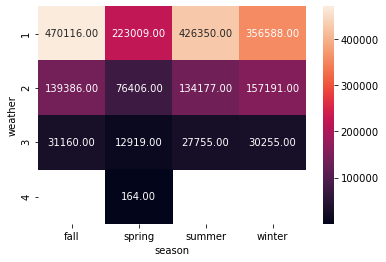

In [113]:
pvt=yl.pivot_table(index='weather',columns='season', values='totalcount',aggfunc='sum')
sns.heatmap(pvt,annot=True,fmt='.2f')

<AxesSubplot:xlabel='season', ylabel='weather'>

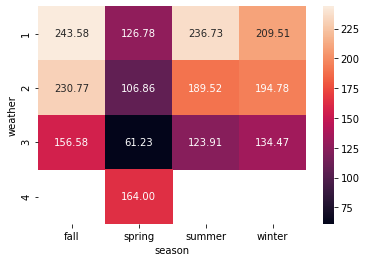

In [114]:
pvtmean=yl.pivot_table(index='weather',columns='season', values='totalcount',aggfunc='mean')
sns.heatmap(pvtmean,annot=True,fmt='.2f')

<br>
<font size='4'>
<li>Clear weather on fall season has the highest number for total count and mean bike rentals followed by the summer for the same weather.<br><br>
<li>Above 60% of bookings for all seasons comes under weather 1.<br><br>
<li>Lowest mean rental bikes is seen for spring season having weather condition 3 representing  Light Snow, Light Rain or Thunderstorm.<br><br>
<li>From the heatmap, it is clear that weather condition 3 and 4 and spring season are least preferable days for renting bikes.<br><br><hr><br>

<br><br>
<font size="5"><ul><b>Insights
    
<hr><br>
    

<div style="font-size: 18px; text-align: justify;">

<li>We can see increase in rental bikes in the year 2012 compared to 2011.
There is a large dip in total bikes rented in the months of November and December for both years.<br><br>


<li>Between the hours of 7 AM to 9 PM , we can see most bikes being rented with  8 to 9 AM and 5 to 7 PM being the peak time .<br><br>


<li>Highest number of services are booked in the fall season ( 30% of all the bookings ) and lowest for spring season( 15% ).<br><br>


 <li>97% of the services are booked during non holidays and  68% of the total bookings are during working days.<br><br>


<li>Weather 1 which represents Clear sky, Few clouds or partly cloudy weather is having more than 70% of all the service bookings.Above 60% of bookings for all seasons comes under weather 1. Weather 4 representing heavy rain or thunderstorm has only one booking.<br><br>

<li>75% of the total bookings are when temperature values lie between 10 and 30.Column casual users has high correlation with temperature. This may be because as temperature increases, number of causal users seeking for rental bikes may also increase.<br><br>

<li>Almost 77% of the total bookings are when the humidity values lie between the intervals of 40 to 90.<br>
 75 % of the total bookings happen when windspeed values lie between the range 5 to 20.<br>
 Humidity has negative correlation with windspeed and different count of users. So we can see a  decrease in total count of users with increase in humidity.<br><br>


<li>81.1968586548107 % of the users are Registered Users.A large number of values for count of casual,registered and total users lie in the range 0-50 at a given hour.<br><br>

    
<li>Statistically, there is no significant difference in the number of bikes rented hourly depending on if it is a weekday or weekend.<br><br>

<li>There is a statistically significant difference in the no: of bike rides rented hourly based on different weather conditions.<br><br>

<li>There is a statistically significant difference in the no: of bike rides rented hourly based on different Seasons.<br><br>

<li>There is significant dependency between weather conditions and different seasons based on total hourly count of bikes rented.<br>Clear weather on fall season has the highest number for total count and mean bike rentals followed by the summer for the same weather. <br> Lowest mean rental bikes is seen for spring season having weather condition 3 representing Light Snow, Light Rain or Thunderstorm.<br><br>
    </font>

<font size="5"><ul><b>Recommendations<hr><br>


<div style="font-size: 18px; text-align: justify;">


<li>We can increase marketing  during the fall and summer seasons, as they both have the highest booking rate . Discounts can be offered to boost rentals further during spring season.<br><br>

<li>As the number of rental bikes clearly depend on optimal weather conditions, temperature and humidity, notifications or internet based advertisements can be pushed more during these weather conditions to encourage more casual and registered users to use the service.<br><br>


<li>As lowest mean rental bikes is seen for spring season having weather condition 3 representing Light Snow, Light Rain or Thunderstorm, weather approriate gears like umbrellas, raincoats and bikes equipped to navigate in all weather conditions can be reserved for these weathers and they can be advertised.<br><br>

<li>We can also ensure the availability of bikes during these optimal weather conditions especially during peak hours of  7 AM to 9 AM and 5 PM to 7 PM.<br><br>

<li>Discounts and offers can be provided in the month of November and December of each year along with boost in advertising to counter the dip in bookings.<br><br>

<li>As 81% users are registered, they can be given offers,personalized recommendations and other benefits. We can also collect constant feedback from these registered users to improve the service.<br><br>

<li>As 68% of all the total bookings are during working days, even though the hourly rental bikes are similar for working and non working days, the availability of bikes can be ensured during working and non-holiday days.
    </font><br><br><hr><br>